In [1]:
import os
os.chdir('/root/awid_dataset/')
import pandas as pd
import numpy as np
import csv
import os
import time
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 5.0)

In [2]:
# Read in the CSV files
dataset_columns = ['frame.interface_id',	'frame.dlt',	'frame.offset_shift',	'frame.time_epoch',	'frame.time_delta',	'frame.time_delta_displayed',	'frame.time_relative',	'frame.len',	'frame.cap_len',	'frame.marked',	'frame.ignored',	'radiotap.version',	'radiotap.pad',	'radiotap.length',	'radiotap.present.tsft',	'radiotap.present.flags',	'radiotap.present.rate',	'radiotap.present.channel',	'radiotap.present.fhss',	'radiotap.present.dbm_antsignal',	'radiotap.present.dbm_antnoise',	'radiotap.present.lock_quality',	'radiotap.present.tx_attenuation',	'radiotap.present.db_tx_attenuation',	'radiotap.present.dbm_tx_power',	'radiotap.present.antenna',	'radiotap.present.db_antsignal',	'radiotap.present.db_antnoise',	'radiotap.present.rxflags',	'radiotap.present.xchannel',	'radiotap.present.mcs',	'radiotap.present.ampdu',	'radiotap.present.vht',	'radiotap.present.reserved',	'radiotap.present.rtap_ns',	'radiotap.present.vendor_ns',	'radiotap.present.ext',	'radiotap.mactime',	'radiotap.flags.cfp',	'radiotap.flags.preamble',	'radiotap.flags.wep',	'radiotap.flags.frag',	'radiotap.flags.fcs',	'radiotap.flags.datapad',	'radiotap.flags.badfcs',	'radiotap.flags.shortgi',	'radiotap.datarate',	'radiotap.channel.freq',	'radiotap.channel.type.turbo',	'radiotap.channel.type.cck',	'radiotap.channel.type.ofdm',	'radiotap.channel.type.2ghz',	'radiotap.channel.type.5ghz',	'radiotap.channel.type.passive',	'radiotap.channel.type.dynamic',	'radiotap.channel.type.gfsk',	'radiotap.channel.type.gsm',	'radiotap.channel.type.sturbo',	'radiotap.channel.type.half',	'radiotap.channel.type.quarter',	'radiotap.dbm_antsignal',	'radiotap.antenna',	'radiotap.rxflags.badplcp',	'wlan.fc.type_subtype',	'wlan.fc.version',	'wlan.fc.type',	'wlan.fc.subtype',	'wlan.fc.ds',	'wlan.fc.frag',	'wlan.fc.retry',	'wlan.fc.pwrmgt',	'wlan.fc.moredata',	'wlan.fc.protected',	'wlan.fc.order',	'wlan.duration',	'wlan.ra',	'wlan.da',	'wlan.ta',	'wlan.sa',	'wlan.bssid',	'wlan.frag',	'wlan.seq',	'wlan.bar.type',	'wlan.ba.control.ackpolicy',	'wlan.ba.control.multitid',	'wlan.ba.control.cbitmap',	'wlan.bar.compressed.tidinfo',	'wlan.ba.bm',	'wlan.fcs_good',	'wlan_mgt.fixed.capabilities.ess',	'wlan_mgt.fixed.capabilities.ibss',	'wlan_mgt.fixed.capabilities.cfpoll.ap',	'wlan_mgt.fixed.capabilities.privacy',	'wlan_mgt.fixed.capabilities.preamble',	'wlan_mgt.fixed.capabilities.pbcc',	'wlan_mgt.fixed.capabilities.agility',	'wlan_mgt.fixed.capabilities.spec_man',	'wlan_mgt.fixed.capabilities.short_slot_time',	'wlan_mgt.fixed.capabilities.apsd',	'wlan_mgt.fixed.capabilities.radio_measurement',	'wlan_mgt.fixed.capabilities.dsss_ofdm',	'wlan_mgt.fixed.capabilities.del_blk_ack',	'wlan_mgt.fixed.capabilities.imm_blk_ack',	'wlan_mgt.fixed.listen_ival',	'wlan_mgt.fixed.current_ap',	'wlan_mgt.fixed.status_code',	'wlan_mgt.fixed.timestamp',	'wlan_mgt.fixed.beacon',	'wlan_mgt.fixed.aid',	'wlan_mgt.fixed.reason_code',	'wlan_mgt.fixed.auth.alg',	'wlan_mgt.fixed.auth_seq',	'wlan_mgt.fixed.category_code',	'wlan_mgt.fixed.htact',	'wlan_mgt.fixed.chanwidth',	'wlan_mgt.fixed.fragment',	'wlan_mgt.fixed.sequence',	'wlan_mgt.tagged.all',	'wlan_mgt.ssid',	'wlan_mgt.ds.current_channel',	'wlan_mgt.tim.dtim_count',	'wlan_mgt.tim.dtim_period',	'wlan_mgt.tim.bmapctl.multicast',	'wlan_mgt.tim.bmapctl.offset',	'wlan_mgt.country_info.environment',	'wlan_mgt.rsn.version',	'wlan_mgt.rsn.gcs.type',	'wlan_mgt.rsn.pcs.count',	'wlan_mgt.rsn.akms.count',	'wlan_mgt.rsn.akms.type',	'wlan_mgt.rsn.capabilities.preauth',	'wlan_mgt.rsn.capabilities.no_pairwise',	'wlan_mgt.rsn.capabilities.ptksa_replay_counter',	'wlan_mgt.rsn.capabilities.gtksa_replay_counter',	'wlan_mgt.rsn.capabilities.mfpr',	'wlan_mgt.rsn.capabilities.mfpc',	'wlan_mgt.rsn.capabilities.peerkey',	'wlan_mgt.tcprep.trsmt_pow',	'wlan_mgt.tcprep.link_mrg',	'wlan.wep.iv',	'wlan.wep.key',	'wlan.wep.icv',	'wlan.tkip.extiv',	'wlan.ccmp.extiv',	'wlan.qos.tid',	'wlan.qos.priority',	'wlan.qos.eosp',	'wlan.qos.ack',	'wlan.qos.amsdupresent',	'wlan.qos.buf_state_indicated',	'wlan.qos.bit4',	'wlan.qos.txop_dur_req',	'wlan.qos.buf_state_indicated',	'data.len',	'class']

print("Reading training csv file.")
df1 = pd.read_csv('awid_train_set')
df1.columns = dataset_columns
df1=df1.replace('?',0)

df1.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True) 

print("Reading testing csv file.")
df2 = pd.read_csv('awid_test_set')
df2.columns = dataset_columns
df2=df2.replace('?',0)

df2.drop([dataset_columns[i] for i in [33, 63, 67, 75, 76, 77, 78, 79, 82, 86, 87, 91, 103, 104, 105, 106, 108, 109, 111, 113, 114,118, 123, 124, 132, 133, 139,  141, 142, 143, 147 ]], axis=1, inplace=True)  

Reading training csv file.


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Reading testing csv file.


In [3]:
print(set(df2['class'].unique()) - set(df1['class'].unique()), set(df1['class'].unique()) - set(df2['class'].unique()))

{'probe_response', 'authentication_request'} {'cts', 'chop_chop', 'power_saving', 'rts', 'hirte', 'disassociation', 'probe_request'}


In [5]:
df = pd.concat([df1, df2])
print(len(df),len(df1),len(df2),len(df1)+len(df2))

#zero_val_columns = ['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.present.fhss', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 'radiotap.flags.datapad', 'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 'radiotap.channel.type.turbo', 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive', 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm', 'radiotap.channel.type.sturbo', 'radiotap.channel.type.half', 'radiotap.channel.type.quarter', 'radiotap.rxflags.badplcp', 'wlan.fc.version', 'wlan.fc.order', 'wlan.ba.control.multitid', 'wlan_mgt.fixed.fragment', 'wlan.qos.eosp', 'wlan.qos.amsdupresent', 'wlan.qos.buf_state_indicated', 'wlan.qos.bit4', 'wlan.qos.txop_dur_req']
#for col in zero_val_columns:
#    df.drop(col, axis=1, inplace=True)

2371216 575642 1795574 2371216


In [6]:
#max([float(i) for i in df1[dataset_columns[37]]])
#[dataset_columns[i] for i in [71, 72, 73, 74, 86, 98, 99, 100, 101, 103, 104]]
#dataset_columns.index(df1.columns[79])
print (len(df['class'].unique()),df['class'].unique(),len(df.columns))
os.chdir('/root/pathint/fig_split_mnist/')
print(os.getcwd())

17 ['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts'
 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte'
 'power_saving' 'disassociation' 'authentication_request' 'probe_response'] 124
/root/pathint/fig_split_mnist


In [7]:
obj_df = df; 
Y_all_attacks = obj_df["class"]
#obj_df=pd.get_dummies(obj_df, columns=["class"])


X = obj_df.values[:,:-1]  #It has 17 labels 
print (X.shape)
print("Datasetset Formatting")

for j in range(0,X.shape[1]):
    maximum = max([float(k) for k in X[:,j]]) if  max([float(k) for k in X[:,j]]) != 0 else 1
    print(j)
    for i in range(0,len(X)):
        X[i,j] = round(float(X[i,j])/maximum,3)


(2371216, 123)
Datasetset Formatting
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


In [8]:
print (X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train_all_attacks, Y_test_all_attacks = train_test_split(X, Y_all_attacks, test_size=0.33)
print (X_train.shape)

#['normal' 'fragmentation' 'arp' 'probe_request' 'chop_chop' 'rts' 'deauthentication' 'amok' 'beacon' 'evil_twin' 'cafe_latte' 'cts' 'hirte' 'power_saving' 'disassociation' 'authentication_request' 'probe_response']
cleanup_nums = {"normal":0, "fragmentation":1, "arp":2, "probe_request":3, "chop_chop":4, "rts":5, "deauthentication":6, "amok":7, "beacon":8, "evil_twin":9, "cafe_latte":10, "cts":11, "hirte":12, "power_saving":13, "disassociation":14, "authentication_request":15, "probe_response":16}
Y_train_all_attacks.replace(cleanup_nums,inplace=True)
Y_test_all_attacks.replace(cleanup_nums,inplace=True)

(2371216, 123)
(1588714, 123)


In [9]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf
slim = tf.contrib.slim
graph_replace = tf.contrib.graph_editor.graph_replace

import sys, os
sys.path.extend([os.path.expanduser('..')])
from pathint import utils
import seaborn as sns
sns.set_style("ticks")

from tqdm import trange, tqdm

# import operator
import matplotlib.colors as colors
import matplotlib.cm as cmx

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

select = tf.select if hasattr(tf, 'select') else tf.where

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['maximum', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
# Data params
input_dim = 123
output_dim = 17

# Network params
n_hidden_units = 20
activation_fn = tf.nn.relu

# Optimization params
batch_size = 64
epochs_per_task = 10

n_stats = 1

# Reset optimizer after each age
reset_optimizer = True

In [11]:
from keras.utils import np_utils

#task_labels = [[8,1],[5,3],[4,9], [11,7], [6,2], [0,10], [14,2],[12,13]]
task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,1]]
#task_labels = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,2],[5,9],[10,3],[12,6],[14,2]]
#task_labels = [[0,9], [7,8], [3,6], [1,4], [2,5]]
#task_labels = [[0,1,2], [3,4,5], [6,7,8],[9,10,11],[12,13,14],[15,16]]
#task_labels = [[1,5,8],[2,5,7,9],[3,4,6]]
n_tasks = len(task_labels)
nb_classes  = 17
training_datasets = []
validation_datasets = []
multihead=False

for labels in task_labels:
    idx = np.in1d(Y_train_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_train[idx], np_utils.to_categorical(label_map[Y_train_all_attacks[idx]], len(labels))
    else:
        data = X_train[idx], np_utils.to_categorical(Y_train_all_attacks[idx], nb_classes)
        training_datasets.append(data)

for labels in task_labels:
    idx = np.in1d(Y_test_all_attacks, labels)
    if multihead:
        label_map = np.arange(nb_classes)
        label_map[labels] = np.arange(len(labels))
        data = X_test[idx], np_utils.to_categorical(label_map[Y_test_all_attacks[idx]], len(labels))
    else:
        data = X_test[idx], np_utils.to_categorical(Y_test_all_attacks[idx], nb_classes)
        validation_datasets.append(data)

In [12]:
for i in range(n_tasks):
    #print('Task:',i,training_datasets[i][0].shape,training_datasets[i][1].shape,validation_datasets[i][0].shape,validation_datasets[i][1].shape)
    print('Task:',i,training_datasets[i][0].shape)
    zero_columns = []
    constant_columns = []
    for j in range(training_datasets[i][0].shape[1]):
        curr= [float(k) for k in training_datasets[i][0][:,j]]
        min_val = min(curr)
        max_val = max(curr)
        mean_val = np.mean(curr)
        std_val= np.std(curr)
        if (min_val == 0 and max_val == 0):
            zero_columns.append(df.columns[j])
        elif (min_val == max_val):
            constant_columns.append(df.columns[j])
    print('Zero columns: ',len(zero_columns),)
    print('They are: ',zero_columns)
    print('Constant columns: ',len(constant_columns))
    print('They are: ',constant_columns)
    print('------------------------------------')

Task: 0 (1450552, 123)
Zero columns:  62
They are:  ['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.present.fhss', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 'radiotap.flags.datapad', 'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 'radiotap.channel.type.turbo', 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive', 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm', 'radiotap.channel

Zero columns:  82
They are:  ['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.present.fhss', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 'radiotap.flags.datapad', 'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 'radiotap.channel.type.turbo', 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive', 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm', 'radiotap.channel.type.sturbo', 'radiota

Zero columns:  61
They are:  ['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.present.fhss', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 'radiotap.flags.datapad', 'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 'radiotap.channel.type.turbo', 'radiotap.channel.type.ofdm', 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive', 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm', 'radiotap.

In [13]:
tf.reset_default_graph()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)
sess.run(tf.global_variables_initializer())
import keras.backend as K
import keras.activations as activations

output_mask = tf.Variable(tf.zeros(output_dim), name="mask", trainable=False)

def masked_softmax(logits):
    # logits are [batch_size, output_dim]
    x = select(tf.tile(tf.equal(output_mask[None, :], 1.0), [tf.shape(logits)[0], 1]), logits, -1e32 * tf.ones_like(logits))
    return activations.softmax(x)

def set_active_outputs(labels):
    new_mask = np.zeros(output_dim)
    for l in labels:
        new_mask[l] = 1.0
    sess.run(output_mask.assign(new_mask))
    #print(sess.run(output_mask))
    
def masked_predict(model, data, targets):
    pred = model.predict(data)
    #print(pred)
    acc = np.argmax(pred,1)==np.argmax(targets,1)
    return acc.mean()

In [14]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(n_hidden_units, kernel_initializer='random_uniform', activation=activation_fn, input_shape=(input_dim,)))
#model.add(Dense(30, kernel_initializer='random_uniform', activation=activation_fn))
#model.add(Dense(n_hidden_units, activation=activation_fn))
model.add(Dense(output_dim, kernel_initializer='zero', activation=masked_softmax))
#model.add(Dense(output_dim, activation=masked_softmax, input_shape=(input_dim,)))

from pathint import protocols
from pathint.optimizers import KOOptimizer
from keras.optimizers import Adam, RMSprop,SGD
from keras.callbacks import Callback
from pathint.keras_utils import LossHistory
from keras.callbacks import History 
from keras.callbacks import LambdaCallback

#protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
protocol_name, protocol = protocols.PATH_INT_PROTOCOL(omega_decay='sum',xi=1e-3)
#protocol_name, protocol = protocols.FISHER_PROTOCOL('sum')
opt = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999)
#opt = SGD(1e-3)
#opt = RMSprop(lr=1e-3)
oopt = KOOptimizer(opt, model=model, **protocol)
model.compile(loss='categorical_crossentropy', optimizer=oopt, metrics=['accuracy'])
model.model._make_train_function()
saved_weights = model.get_weights()

save_weights_epoch=[]
save_loss_epoch=[]
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_weights_epoch.append(model.get_weights()))
history = LossHistory()
#history = History()
callbacks = [history]
datafile_name = "split_mnist_data_%s.pkl.gz"%protocol_name

In [15]:
print(model.summary())
a_list = model.get_weights()
for i in range(len(a_list)):
    print((np.array(a_list[i])).shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                2480      
_________________________________________________________________
dense_2 (Dense)              (None, 17)                357       
Total params: 2,837
Trainable params: 2,837
Non-trainable params: 0
_________________________________________________________________
None
(123, 20)
(20,)
(20, 17)
(17,)


In [16]:
print(protocol)

{'step_updates': [('grads2', <function <lambda>.<locals>.<lambda> at 0x7f158d5b3840>)], 'regularizer_fn': <function quadratic_regularizer at 0x7f158d5f7c80>, 'init_updates': [('cweights', <function <lambda>.<locals>.<lambda> at 0x7f158d5f7d90>)], 'task_updates': [('omega', <function <lambda>.<locals>.<lambda> at 0x7f150dde4158>), ('cweights', <function <lambda>.<locals>.<lambda> at 0x7f150dde41e0>), ('grads2', <function <lambda>.<locals>.<lambda> at 0x7f150dde4268>)]}


In [17]:
def run_fits(cvals, training_data, valid_data, eval_on_train_set=False, nstats=1):
    acc_mean = dict()
    acc_std = dict()
    model_weights_save = []   #Empty list to save the model weights aftertraining each task
    imp_par = dict()  #Empty list to save importance parameter after learning each progressive task
    for cidx, cval_ in enumerate(tqdm(cvals)):
        runs = []
        for runid in range(nstats):
            sess.run(tf.global_variables_initializer())
            # model.set_weights(saved_weights)
            cstuffs = []
            evals = []
            print("setting cval")
            cval = cval_
            oopt.set_strength(cval)
            oopt.init_task_vars()
            print("cval is", sess.run(oopt.lam))
            for age, tidx in enumerate(range(n_tasks)):
                print("Age %i, cval is=%f"%(age,cval))
                print("settint output mask")
                set_active_outputs(task_labels[age])
                stuffs = model.fit(training_data[tidx][0], training_data[tidx][1], batch_size, epochs_per_task, callbacks=[print_weights])
                save_loss_epoch.append(stuffs.history['loss'])
                oopt.update_task_metrics(training_data[tidx][0], training_data[tidx][1], batch_size)
                oopt.update_task_vars()
                ftask = []
                model_weights_save.append(model.get_weights()) #Save the model weights aftertraining each task
                for j in range(n_tasks):
                    set_active_outputs(task_labels[j])
                    if eval_on_train_set:
                        f_ = masked_predict(model, training_data[j][0], training_data[j][1])
                    else:
                        f_ = masked_predict(model, valid_data[j][0], valid_data[j][1])
                    ftask.append(np.mean(f_))
                evals.append(ftask)
                cstuffs.append(stuffs)

                # Re-initialize optimizater variables
                if reset_optimizer:
                    oopt.reset_optimizer()

            evals = np.array(evals)
            runs.append(evals)
        
        runs = np.array(runs)
        acc_mean[cval_] = runs.mean(0)
        acc_std[cval_] = runs.std(0)
    return dict(mean=acc_mean, std=acc_std),model_weights_save, imp_par

In [18]:
# cvals = np.concatenate(([0], np.logspace(-2, 2, 10)))
# cvals = np.concatenate(([0], np.logspace(-1, 2, 2)))
# cvals = np.concatenate(([0], np.logspace(-2, 0, 3)))
#cvals = np.logspace(-3, 3, 7)#[0, 1.0, 2, 5, 10]
cvals = [1.0]
print(cvals)

[1.0]


In [19]:
#%%capture

recompute_data = True

if recompute_data:
    data,model_weights_save,imp_par = run_fits(cvals, training_datasets, validation_datasets, eval_on_train_set=False, nstats=n_stats)
    utils.save_zipped_pickle(data, datafile_name)

  0%|          | 0/1 [00:00<?, ?it/s]

setting cval
cval is 1.0
Age 0, cval is=1.000000
settint output mask
Epoch 1/10
1450552/1450552 [==============================] - 66s - loss: 0.0015 - acc: 0.9998    
Epoch 2/10
1450552/1450552 [==============================] - 66s - loss: 1.6356e-04 - acc: 0.9999    
Epoch 3/10
1450552/1450552 [==============================] - 66s - loss: 1.3856e-04 - acc: 1.0000    
Epoch 4/10
1450552/1450552 [==============================] - 66s - loss: 1.2674e-04 - acc: 1.0000    
Epoch 5/10
1450552/1450552 [==============================] - 65s - loss: 1.0532e-04 - acc: 1.0000    
Epoch 6/10
1450552/1450552 [==============================] - 65s - loss: 1.0275e-04 - acc: 1.0000    
Epoch 7/10
1450552/1450552 [==============================] - 66s - loss: 8.8689e-05 - acc: 1.0000    
Epoch 8/10
1450552/1450552 [==============================] - 66s - loss: 8.5640e-05 - acc: 1.0000    
Epoch 9/10
1450552/1450552 [==============================] - 66s - loss: 7.2034e-05 - acc: 1.0000    
Epoch 10

100%|██████████| 1/1 [15:53<00:00, 953.97s/it]


In [20]:
import h5py
print(model.summary())
model.save_weights('saved_weights.h5') #This file cannot be opend normaly to view the weghts. It can be loaded through load_model() or can be opend via hdf5 viewer

#Shape of the array containg model weights
a_list = model.get_weights()
for i in range(len(a_list)):
    print((np.array(a_list[i])).shape)

#a_list[0][0][0] = a_list[0][0][0]+0.00001
#print(a_list[0][0][0])
#model.set_weights(a_list)

#from keras.utils.vis_utils import plot_model
#import pydot
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                2480      
_________________________________________________________________
dense_2 (Dense)              (None, 17)                357       
Total params: 2,837
Trainable params: 2,837
Non-trainable params: 0
_________________________________________________________________
None
(123, 20)
(20,)
(20, 17)
(17,)


In [21]:
data = utils.load_zipped_pickle(datafile_name)
print(cvals)

[1.0]


In [22]:
import matplotlib.colors as colors
cmap = plt.get_cmap('cool') 
cNorm  = colors.Normalize(vmin=-5, vmax=np.log(np.max(list(data['mean'].keys()))))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
print(scalarMap.get_clim())

(-5.0, 0.0)


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


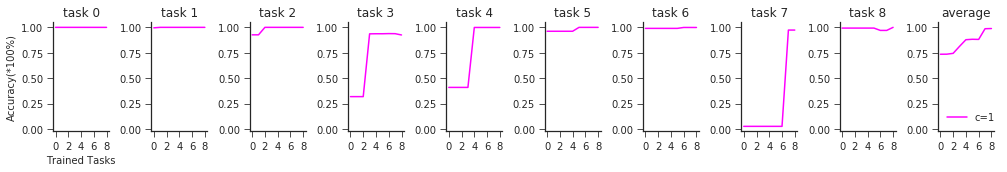

In [23]:
figure(figsize=(14, 2.5))
axs = [subplot(1,n_tasks+1,1)]#, None, None]
for i in range(1, n_tasks + 1):
    axs.append(subplot(1, n_tasks+1, i+1, sharex=axs[0], sharey=axs[0]))
    
keys = list(data['mean'].keys())
sorted_keys = np.sort(keys)

for cval in sorted_keys:
    mean_vals = data['mean'][cval]
    std_vals = data['std'][cval]
    for j in range(n_tasks):
        colorVal = scalarMap.to_rgba(np.log(cval))
        # axs[j].plot(evals[:, j], c=colorVal)
        axs[j].errorbar(range(n_tasks), mean_vals[:, j], yerr=std_vals[:, j]/np.sqrt(n_stats), c=colorVal)
        axs[j].set_xticks(range(0,n_tasks,2))
        if j==0:
            axs[j].set_xlabel('Trained Tasks')
            axs[j].set_ylabel('Accuracy(*100%)')
    label = "c=%g"%cval
    average = mean_vals.mean(1)  #Taking the average of cross validation accuracies accross all tasks after learning each task
    axs[-1].plot(average, c=colorVal, label=label)
    
for i, ax in enumerate(axs):
    ax.legend(loc='best')
    ax.set_title((['task %d'%j for j in range(n_tasks)] + ['average'])[i])
gcf().tight_layout()
sns.despine()
plt.savefig('Catastrophic-forgetting-AWID.pdf')

In [24]:
for j in range(n_tasks):
    print('Rank of data for task-{0} of shape-{1} is: {2}'.format(j,training_datasets[j][0].shape,matrix_rank(np.matrix(training_datasets[j][0], dtype='float'))))
    print('----------------------------------------------------------------------')

Rank of data for task-0 of shape-(1450552, 123) is: 45
----------------------------------------------------------------------
Rank of data for task-1 of shape-(52763, 123) is: 8
----------------------------------------------------------------------
Rank of data for task-2 of shape-(2063, 123) is: 11
----------------------------------------------------------------------
Rank of data for task-3 of shape-(31164, 123) is: 9
----------------------------------------------------------------------
Rank of data for task-4 of shape-(3789, 123) is: 18
----------------------------------------------------------------------
Rank of data for task-5 of shape-(31936, 123) is: 21
----------------------------------------------------------------------
Rank of data for task-6 of shape-(13015, 123) is: 18
----------------------------------------------------------------------
Rank of data for task-7 of shape-(2385, 123) is: 8
----------------------------------------------------------------------
Rank of data

In [25]:
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()


[0.999991600849994, 0.9999316693304703, 0.999974802549982, 0.9840243508045968, 0.9871802904691418, 0.9892550789354635, 0.990838952097133, 0.9885663652091471, 0.9884011124789485]


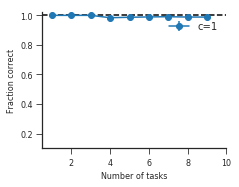

In [26]:
#Fractional Correctness = Average of cross validation accuracies of learned tasks only after training each task 
fig = plt.figure(figsize=(3.3,2.5))
ax = plt.subplot(111)

for cval in sorted_keys:
    mean_stuff = []
    std_stuff = []
    for i in range(len(data['mean'][cval])):
        mean_stuff.append(data['mean'][cval][i][:i+1].mean())
        std_stuff.append(np.sqrt((data['std'][cval][i][:i+1]**2).sum())/(n_stats*np.sqrt(n_stats)))
    # plot(range(1,n_tasks+1), mean_stuff, 'o-', label="c=%g"%cval)
    errorbar(range(1,n_tasks+1), mean_stuff, yerr=std_stuff, fmt='o-', label="c=%g"%cval)
        
axhline(data['mean'][cval][0][0], linestyle='--', color='k')
xlabel('Number of tasks')
ylabel('Fraction correct')
legend(loc='best')
xlim(0.5, n_tasks+1)
ylim(0.1, 1.02)
# grid('on')
# sns.despine()
print(mean_stuff)
simple_axis(ax)
plt.savefig('2attack_fractional_correct_AWID.pdf')

In [27]:
len(mean_stuff)

9

In [36]:
len(model_weights_save),len(save_weights_epoch),

(9, 90)

In [37]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+80 
for i in range(n_tasks):   
    Extract_model_params.append(Flatten_weights[i])

In [38]:
len(Extract_model_params),n_tasks

(9, 9)

In [176]:
#Weights Pattern after training each task
from math import*
#1. Euclidean distance
def euclidean_distance(x,y):
    return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))
#2. Manhattan Distance
def manhattan_distance(x,y):
    return sum(abs(a-b) for a,b in zip(x,y))
#3.  Minkowski distance 
from decimal import Decimal
def nth_root(value, n_root):
    root_value = 1/float(n_root)
    return round (Decimal(value) ** Decimal(root_value),3)
def minkowski_distance(x,y,p_value):
    return nth_root(sum(pow(abs(a-b),p_value) for a,b in zip(x, y)),p_value)
#4. Cosine Similarity
def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)
#5. Jaccard similarity
def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)
#6. Using Heuristic    
import difflib 

for i in [0,1,2,3,4,5,6,7]:
    print("Eucledian Parameter shift after task {0} :".format(i+1),euclidean_distance(Extract_model_params[i],Extract_model_params[i+1]))
#for i in [0,1,2,3]:
#    print("Manhattan Parameter shift after task {0} :".format(i+1),manhattan_distance(Extract_model_params[i],Extract_model_params[i+1]))
#for i in [0,1,2,3]:
#    print("Minkowsk iParameter shift after task {0} :".format(i+1),minkowski_distance(Extract_model_params[i],Extract_model_params[i+1],3))
for i in [0,1,2,3,4,5,6,7]:
    print("Cosine Parameter shift after task {0} :".format(i+1),cosine_similarity(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7]:
    print("Jaccard Parameter shift after task {0} :".format(i+1),jaccard_similarity(Extract_model_params[i],Extract_model_params[i+1]))
for i in [0,1,2,3,4,5,6,7]:
    print("Heuristic Parameter shift after task {0} :".format(i+1),difflib.SequenceMatcher(None,Extract_model_params[i],Extract_model_params[i+1]).ratio())

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


Eucledian Parameter shift after task 1 : 2.7824163325561404
Eucledian Parameter shift after task 2 : 3.551588252916112
Eucledian Parameter shift after task 3 : 6.5737174840256545
Eucledian Parameter shift after task 4 : 4.270053869921836
Eucledian Parameter shift after task 5 : 6.019747971734411
Eucledian Parameter shift after task 6 : 0.3157356820758686
Eucledian Parameter shift after task 7 : 4.535606333035204
Eucledian Parameter shift after task 8 : 3.0939059708072034
Cosine Parameter shift after task 1 : 0.974
Cosine Parameter shift after task 2 : 0.959
Cosine Parameter shift after task 3 : 0.881
Cosine Parameter shift after task 4 : 0.956
Cosine Parameter shift after task 5 : 0.926
Cosine Parameter shift after task 6 : 1.0
Cosine Parameter shift after task 7 : 0.964
Cosine Parameter shift after task 8 : 0.984
Jaccard Parameter shift after task 1 : 0.6688818260618319
Jaccard Parameter shift after task 2 : 0.6904347826086956
Jaccard Parameter shift after task 3 : 0.587823275862069
J

In [39]:
#Counting the number of changed parameters
changed_model_parameters=[]
for i in range(1,len(Extract_model_params)):
    temp=[]
    for j,k in zip(Extract_model_params[i],Extract_model_params[i-1]):
        temp.append(abs(i-j))
    changed_model_parameters.append(temp)
print(len(changed_model_parameters))

import csv
#Save the model parameters in text file
with open('temp', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(Extract_model_params)

8


In [40]:
#Number of parameters unchanged within the thresold. Checked for five threshold values as [1e-5, 1e-4, 1e-3, 1e-2, 1e-1].
for i in range(len(changed_model_parameters)):
    print('-----After learning',i+2,'task-----')
    for j in [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]:
        print(j,'---->',sum(k < j for k in changed_model_parameters[i]))

-----After learning 2 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 14
-----After learning 3 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 7
-----After learning 4 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 2
-----After learning 5 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 6 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 7 task-----
1e-05 ----> 0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  """


0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 8 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0
-----After learning 9 task-----
1e-05 ----> 0
0.0001 ----> 0
0.001 ----> 0
0.01 ----> 0
0.1 ----> 0


In [41]:
import pandas as pd
from numpy.linalg import matrix_rank
import math
corr_matrix = []
corr_row = []
Rank_corr_matrix=[]
for j in range(n_tasks):
    df = pd.DataFrame(training_datasets[j][0])
    correlation_matrix = df.corr().values
    correlation_matrix = np.nan_to_num(correlation_matrix)
    for k in range(len(correlation_matrix)):
        for i in range(len(correlation_matrix)):
            corr_elem = (math.ceil(correlation_matrix[k][i]*1e10)/1e10)
            corr_row.append(np.around(corr_elem))
        corr_matrix.append(corr_row)
        corr_row = []
    rank_corr_matrix=np.linalg.matrix_rank(np.asarray(corr_matrix))
    Rank_corr_matrix.append(rank_corr_matrix)
    print('Rank of the Autocorrelation Matrix for task=',j,'is :',rank_corr_matrix)

Rank of the Autocorrelation Matrix for task= 0 is : 0
Rank of the Autocorrelation Matrix for task= 1 is : 0
Rank of the Autocorrelation Matrix for task= 2 is : 0
Rank of the Autocorrelation Matrix for task= 3 is : 0
Rank of the Autocorrelation Matrix for task= 4 is : 0
Rank of the Autocorrelation Matrix for task= 5 is : 0
Rank of the Autocorrelation Matrix for task= 6 is : 0
Rank of the Autocorrelation Matrix for task= 7 is : 0
Rank of the Autocorrelation Matrix for task= 8 is : 0


In [42]:
#Weights Pattern after training each task
Flatten_weights=[]
#Flattening the weights into a list
def flatten(x):
    try:
        it = iter(x)
    except TypeError:
        yield x
    else:
        for i in it:
            for j in flatten(i):
                yield j
                
for i in range(len(model_weights_save)):
    if i == 0:
        Flatten_weights.append(list(flatten(save_weights_epoch[epochs_per_task-2])))
        Flatten_weights.append(list(flatten(save_weights_epoch[epochs_per_task-1])))
    Flatten_weights.append(list(flatten(model_weights_save[i]))) 

Extract_model_params = [];
#For model parameters without consolidation use val, with consolidation use val+80 
for i in range(len(Flatten_weights)):   
    Extract_model_params.append(Flatten_weights[i])
    
gradient_save=[]
for i in range(1,len(Extract_model_params)):
    if i == 2:
        pass
    else :
        temp=list(np.asarray(Extract_model_params[i])-np.asarray(Extract_model_params[i-1]))
        gradient = [j/0.001 for j in temp]
        gradient_save.append(gradient)
    
#Creating the Hessian matrix from the gradients
import math
Hessian_matrix = []
Hessian_row = []
Rank_Hessian_matrix = []
for k in range(len(gradient_save)):
    for i in range(len(gradient_save[k])):
        partial_deriv_1 = (math.ceil(gradient_save[k][i]*1e10)/1e10)
        for j in range(len(gradient_save[k])):
            partial_deriv_2 = (math.ceil(gradient_save[k][j]*1e10)/1e10)
            Hessian_row.append(np.around(partial_deriv_1*partial_deriv_2))
        Hessian_matrix.append(Hessian_row)
        Hessian_row = []
    rank_Hessian_matrix = np.linalg.matrix_rank(np.asarray(Hessian_matrix))
    Rank_Hessian_matrix.append(rank_Hessian_matrix)
    print('Rank of the Hessian Matrix after task=',k,'is :',rank_Hessian_matrix)

Rank of the Hessian Matrix after task= 0 is : 343
Rank of the Hessian Matrix after task= 1 is : 394
Rank of the Hessian Matrix after task= 2 is : 452
Rank of the Hessian Matrix after task= 3 is : 530
Rank of the Hessian Matrix after task= 4 is : 707
Rank of the Hessian Matrix after task= 5 is : 739
Rank of the Hessian Matrix after task= 6 is : 765
Rank of the Hessian Matrix after task= 7 is : 783
Rank of the Hessian Matrix after task= 8 is : 1094


In [52]:
#Saving the parameters for future use
import pickle
with open("AWID_Parameters.txt", "wb") as fp:   #Pickling
    pickle.dump(model_weights_save, fp)
    
with open("AWID_Parameters.txt", "rb") as fp:   # Unpickling
    b = pickle.load(fp)